## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = 'C:/Users/User/Movie Industry Analysis'

In [4]:
# I will use the prepared data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_numeric.csv'), index_col = False)

In [5]:
df.shape

(7574, 6)

In [8]:
df.head()

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0


### 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-2.1504835874135166e+20,
 -8.269825337130675e+19,
 -4.357912301268792e+19,
 -3.0276794453054534e+19,
 -2.048427279371874e+19,
 -1.5328944262085587e+19,
 -1.2116621728534667e+19,
 -1.0200580824841447e+19,
 -8.949401038593863e+18]

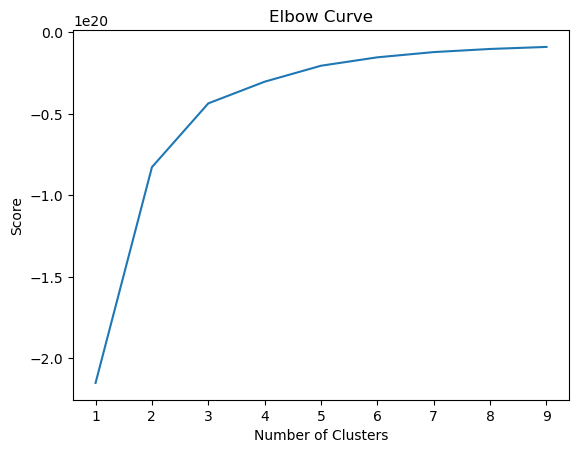

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df.head()

,year,score,votes,budget,gross,runtime,clusters
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0,2
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0,2
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0,2
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0,2


In [16]:
df['clusters'].value_counts()

clusters
2    6534
0     881
1     159
Name: count, dtype: int64

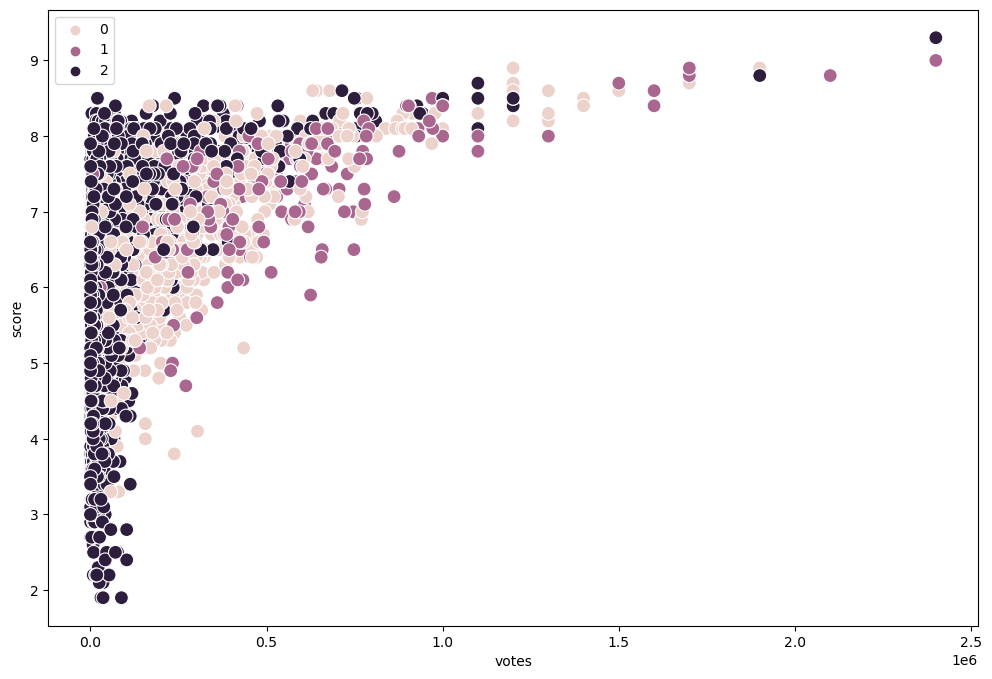

In [18]:
# Plot the clusters for the "votes" and "score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['votes'], y=df['score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('votes') # Label x-axis.
plt.ylabel('score') # Label y-axis.
plt.show()

### We can see that the cluster 2 corresponds to small votes and a big range of scores. However, the clusters have vague borders.  

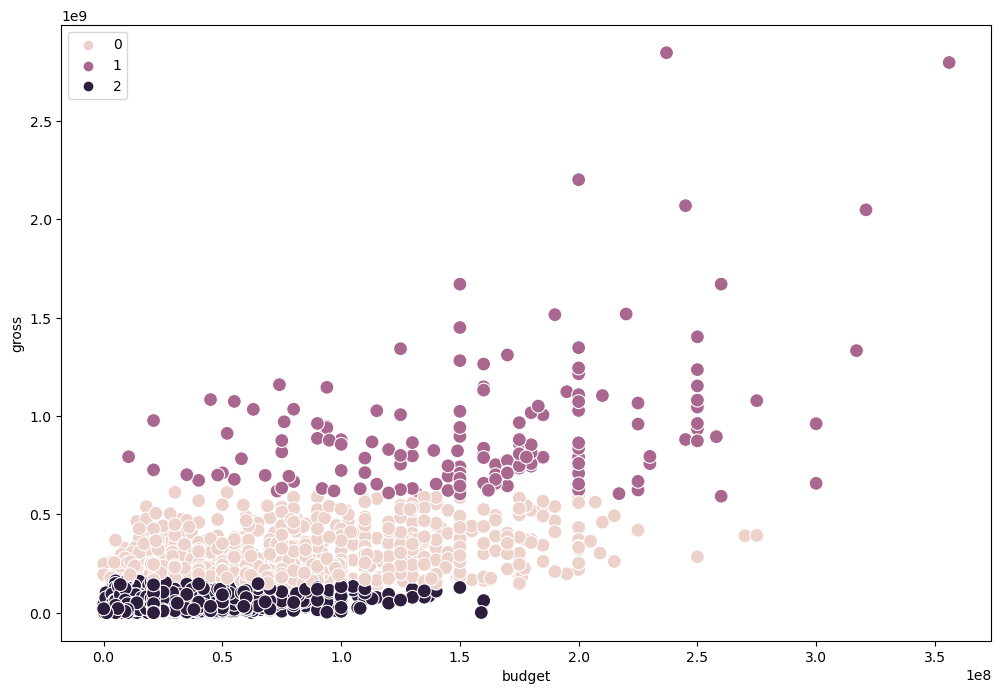

In [19]:
# Plot the clusters for the "budget" and "gross" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['budget'], y=df['gross'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('budget') 
plt.ylabel('gross') 
plt.show()

### We can see that the clusters for budget/gross are clearly distiguishable. However, this weakly confirms that the bigger the budget the bigger gross profit. This also means that there are some other factors determining the gross profit!

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [21]:
df.groupby('cluster').agg({'votes':['mean', 'median'], 
                         'score':['mean', 'median'], 
                         'budget':['mean', 'median'],
                          'gross':['mean', 'median']})

votes               score               budget  \
                      mean    median      mean median          mean   
cluster                                                               
dark purple   53329.688399   24000.0  6.330135    6.4  2.222153e+07   
pink         266236.656073  198000.0  6.675255    6.7  7.844549e+07   
purple       569977.987421  487000.0  7.238365    7.3  1.590660e+08   

                                 gross               
                  median          mean       median  
cluster                                              
dark purple   21000000.0  2.963218e+07   15296081.0  
pink          70000000.0  2.811388e+08  245724603.0  
purple       160000000.0  9.274855e+08  829747654.0

### 1. All three statistics (dark purple, pink, and purple) are significatly different in almost all categories excluding score.                                                                                                                                                                                         2. The scores of the movies don’t seem to matter much.                                                                                                    3.  The medians of gros